# Loading and Visualization of Muon GNSS-R Soil Moisture Products

This notebook is a very brief demonstration of how to load and visualize the L2 (aggregated trackwise) and L3 (hourly and daily gridded) soil moisture product files. This notebook assumes the data has been downloaded from the [Zenodo](https://zenodo.org/uploads/14172456) repository. This data is described in detail in the associated manuscript available [here](linktoarxiv).

In [1]:
# Uncomment/comment out the below magic function as needed for interactive plotting
%matplotlib notebook 
#%matplotlib widget  

import os
import numpy as np
import matplotlib.pyplot as plt
import h5netcdf.legacyapi as netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cf

from datetime import datetime

# Suppress annoying cartopy warnings
import warnings
warnings.filterwarnings('ignore')

## Set the Path to Zenodo Directory

This is the full path to where you downloaded/extracted the dataset from Zenodo

In [2]:
# NEED TO CHANGE THIS!
path_to_zenodo_directory = "/Users/maxroberts/Desktop/"     # <------ CHANGE ME!

## Looking at L2 Files

These are the "aggregated trackwise" files, which are retrievals given along a given along a "track", defined as a continuous recording of the surface reflection from a GNSS satellite by a GNSS reflection receiver. These are aggregated into a single file for each CYGNSS satellite, per day.

In [3]:
def load_level2_file(file_path):
    """Open up the product file, prints list of all variables, returns some for plotting"""
    with netCDF4.Dataset(file_path,'r') as file:
        print(file)
        latitude = file['lat'][:]
        longitude = file['lon'][:]
        soil_moisture_level2 = np.ma.getdata(file['soil_moisture_level2'][:])
    return latitude, longitude, soil_moisture_level2

def plot_level2_data(latitude, longitude, soil_moisture):
    """Scatter plot trackwise data"""
    plt.figure(figsize=(9,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    mask = soil_moisture!=-9999
    p1 = plt.scatter(longitude[mask],
                     latitude[mask],
                     c=soil_moisture[mask],
                     vmin=0.04, vmax=0.45,
                     cmap='gist_earth_r',
                     s=1,linewidths=0,)
    ax.add_feature(cf.COASTLINE, linewidth=0.5, color='gray')
    ax.add_feature(cf.BORDERS, linewidth=0.5, color='gray')
    plt.colorbar(shrink=0.5, label='Soil Moisture')
    plt.ylim(-90,90)
    plt.xlim(-180,180)
    plt.tight_layout()

In [4]:
# Load L2 data from particular CYGNSS sat on a given date, print out variables

version = "v1.0"
sat = "CY001"
dt = datetime(year=2022, month=1, day=1)

subpath = f"{version}/trackwiseSoilMoisture/{sat}/{dt.strftime("%Y-%m-%d")}/aggregateSoilMoisture_muon_{sat}_{dt.strftime("%Y%m%d")}_{version}.nc4"
file_path = os.path.join(path_to_zenodo_directory, subpath)            
latitude, longitude, soil_moisture_level2 = load_level2_file(file_path)

<h5netcdf.legacyapi.Dataset 'aggregateSoilMoisture_muon_CY001_20220101_v1.0.nc4' (mode r)>
Dimensions:
    obs: <h5netcdf.Dimension 'obs': size 1363>
    igbp_class: <h5netcdf.Dimension 'igbp_class': size 17>
    trajectory: <h5netcdf.Dimension 'trajectory': size 194>
Groups:
Variables:
    trajectory: ('trajectory',) int32
    trajectory_length: ('trajectory',) float64
    time: ('trajectory', 'obs') float64
    lat: ('trajectory', 'obs') float32
    lon: ('trajectory', 'obs') float32
    soil_moisture_level2: ('trajectory', 'obs') float32
    elevation: ('trajectory', 'obs') float32
    elevation_std: ('trajectory', 'obs') float32
    slope: ('trajectory', 'obs') float32
    slope_std: ('trajectory', 'obs') float32
    normalized_difference_vegetation_index: ('trajectory', 'obs') float32
    fractional_vegetation_water_content_ndvi: ('trajectory', 'obs') float32
    fractional_land_cover_class: ('trajectory', 'obs', 'igbp_class') float32
    surface_roughness: ('trajectory', 'obs') f

<IPython.core.display.Javascript object>


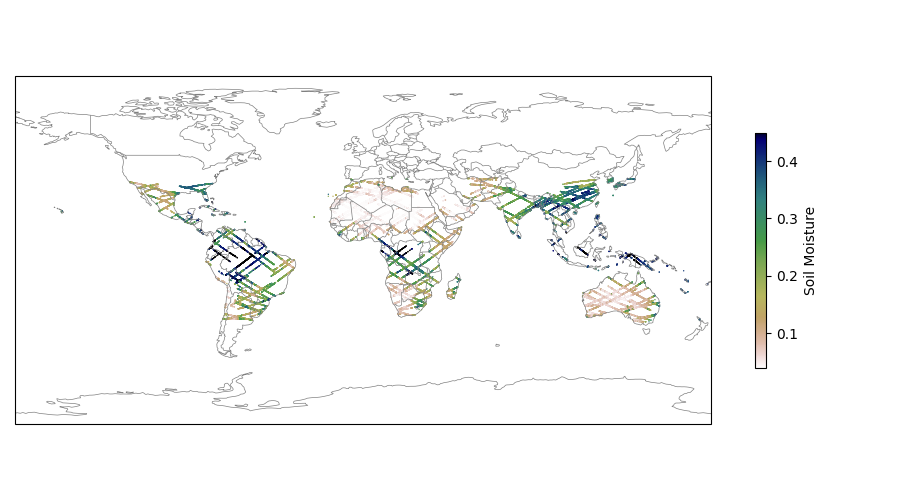

In [5]:
# Plot level 2 soil moisture
plot_level2_data(latitude, longitude, soil_moisture_level2)

## Looking at L3 Files

These are the "gridded" files, which are generated from the L2 "trackwise" retrievals above, but are gridded to 9 km EASE2.0 grids on an hourly and daily basis.

In [6]:
def load_level3_file(file_path):
    """Open up the product file, prints list of all variables, returns SM for plotting
    This function can be used for hourly or daily files"""
    with netCDF4.Dataset(file_path,'r') as file:
        print(file)
        latitude = file['latitude'][:]
        longitude = file['longitude'][:]
        soil_moisture_level3 = file['soil_moisture_level3'][:]
    return latitude, longitude, soil_moisture_level3

def plot_level3_data(latitude, longitude, soil_moisture):
    """Color mesh plot gridded data"""
    plt.figure(figsize=(9,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    p1 = plt.pcolormesh(longitude, 
                        latitude, 
                        soil_moisture, 
                        vmin=0.04, vmax=0.45, 
                        cmap='gist_earth_r')
    ax.add_feature(cf.COASTLINE, linewidth=0.5, color='gray')
    ax.add_feature(cf.BORDERS, linewidth=0.5, color='gray')
    plt.colorbar(shrink=0.5, label='Soil Moisture')
    plt.ylim(-90,90)
    plt.xlim(-180,180)

In [7]:
# Load L3 data from particular CYGNSS sat on a given date, print out variables

version = "v1.0"
sat = "CY001"
dt = datetime(year=2022, month=1, day=1)
timescale = "daily"    # Set to "daily" or "hourly"

subpath = f"{version}/griddedSoilMoisture/{timescale}SoilMoisture/CYGNSS/{dt.strftime("%Y-%m-%d")}/{timescale}SoilMoisture_muon_CYGNSS_{dt.strftime("%Y%m%d")}_{version}.nc4"
file_path = os.path.join(path_to_zenodo_directory, subpath)            
latitude, longitude, soil_moisture_level3 = load_level3_file(file_path)

<h5netcdf.legacyapi.Dataset 'dailySoilMoisture_muon_CYGNSS_20220101_v1.0.nc4' (mode r)>
Dimensions:
    X: <h5netcdf.Dimension 'X': size 3856>
    Y: <h5netcdf.Dimension 'Y': size 1624>
Groups:
Variables:
    X: ('X',) int64
    Y: ('Y',) int64
    latitude: ('Y', 'X') float32
    longitude: ('Y', 'X') float32
    soil_moisture_level3: ('Y', 'X') float32
    aggregate_quality_flag: ('Y', 'X') int64
    coastalproximity_quality_flag: ('Y', 'X') int64
    urbanfraction_quality_flag: ('Y', 'X') int64
    permanentsnowice_quality_flag: ('Y', 'X') int64
    surfaceelevation_quality_flag: ('Y', 'X') int64
    densevegetation_quality_flag: ('Y', 'X') int64
Attributes:
    title: 'Muon Level 3 Daily CYGNSS Soil Moisture Retrievals v1.0'
    institution: 'Muon Space'
    source: 'Soil moisture retrievals using observations of GNSS-R DDMs from CYGNSS.'
    history: '09/30/2024, 11:09:08'
    references: 'T. Maximilian Roberts, Dallas Masters, Clara Chew, Stephen Lowe, and Dan McCleese, THE MUON 

<IPython.core.display.Javascript object>


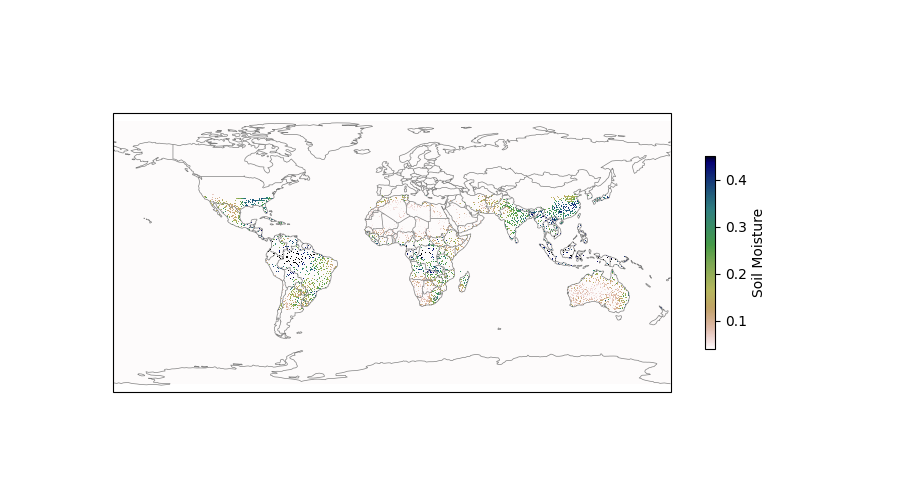

In [8]:
# Plot level 3 soil moisture (zoom in on me!)
plot_level3_data(latitude, longitude, soil_moisture_level3)